# 1. 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액

## 1.1 K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까? (2014~2019년 기준)

# 2. 필요 라이브러리 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install koreanize-matplotlib

import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3. 데이터 로드하기

In [3]:
df_raw = pd.read_csv('/content/drive/MyDrive/data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20221118183337.csv', encoding = 'cp949')

df_raw.shape

(450, 27)

In [4]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [5]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,2033,1553,1784,1773,1298,1408,1653,1383
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1787
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1738
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


# 4. 분석과 시각화를 위한 tidy data 만들기



In [6]:
# melt 함수 사용!!!!
df = df_raw.melt(id_vars = ["국가(대륙)별", "상품군별", "판매유형별"], var_name = "기간",value_name = "백만원")

df.shape

(10800, 5)

In [7]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


# 5 데이터 전처리

## 5.1 기간에서 연도를 분리하기

In [9]:
df["연도"] = df["기간"].map(lambda x : int(x.split('.')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014


In [10]:
# 기간에서 분기만 분리하기
df["분기"] = df["기간"].map(lambda x : int(x.split('.')[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


## 5.2 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [11]:
# - 문자를 결측치로 변경하고 float 타입으로 변경하기

df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


## 5.3 필요없는 데이터 제거하기

In [12]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거하기
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019.4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019.4/4,531.0,2019,4
10797,기타,기 타,계,2019.4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019.4/4,1.0,2019,4


In [13]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# 6. K-Beauty 시각화

## 6.1 전체 상품군 판매액

In [14]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "계" 데이터만 가져와서 봐야지
# 평균 값을 구하는 그래프에서 올바른 값을 표현할 수 있습니다.

df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


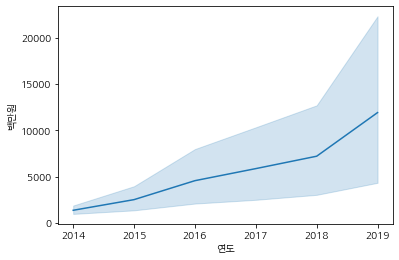

In [15]:
# 연도, 판매액 lineplot으로 그리기
sns.lineplot(data = df_total, x = "연도", y = "백만원")

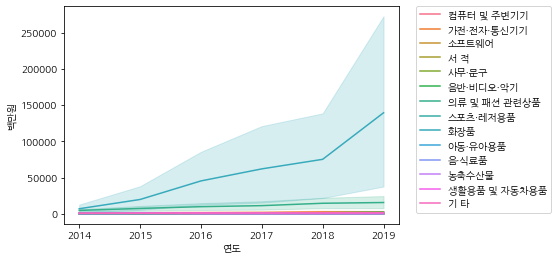

In [16]:
# 연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시하기
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별")

# 범례 그래프 밖에 그리기
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

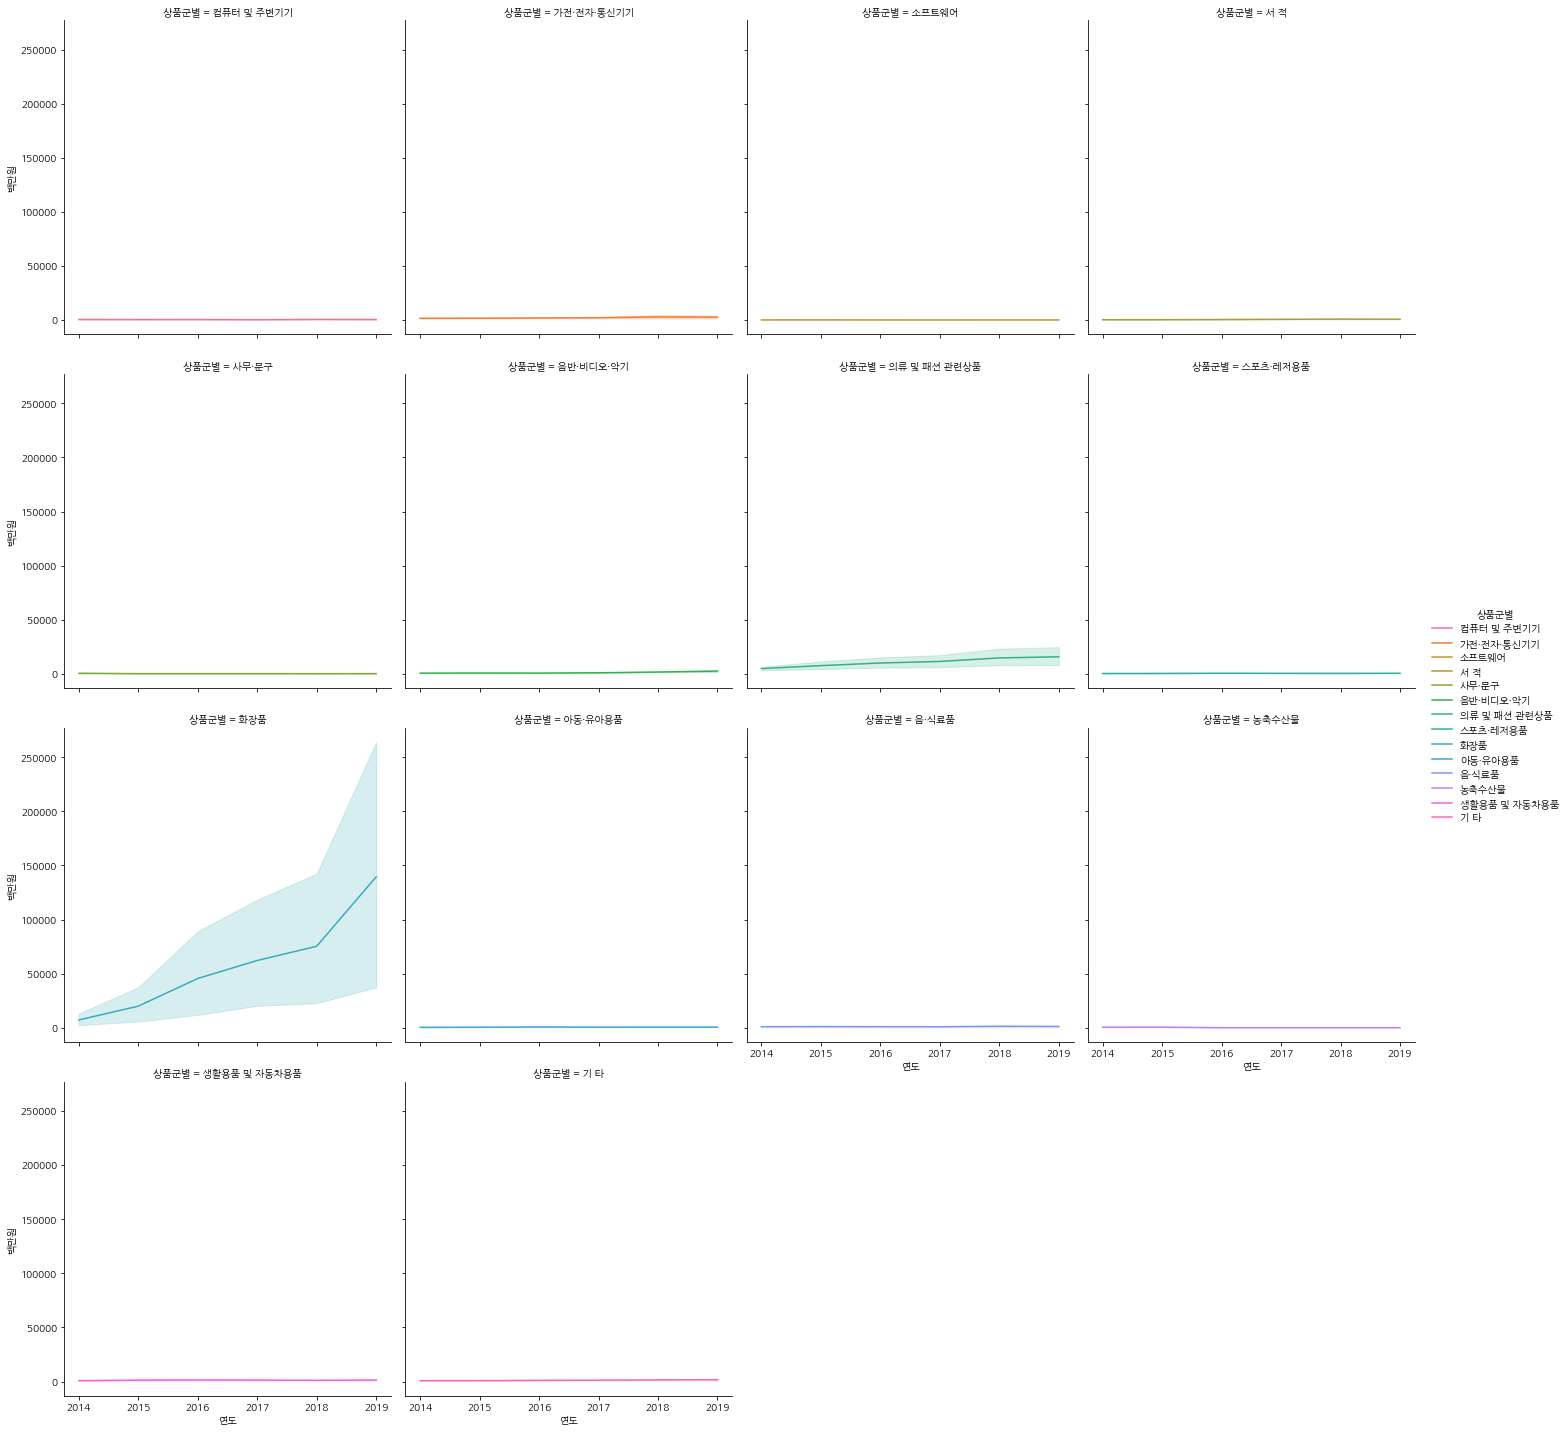

In [17]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기
sns.relplot(data = df_total, x = "연도", y = "백만원",
            hue="상품군별", kind = "line", col = "상품군별", col_wrap = 4)

In [18]:
# isin을 사용해 화장품만 제외하고 df_sub라느 변수에 담습니다.(+ 의류 및 패션 관련상품도 제외)
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련상품"])].copy()

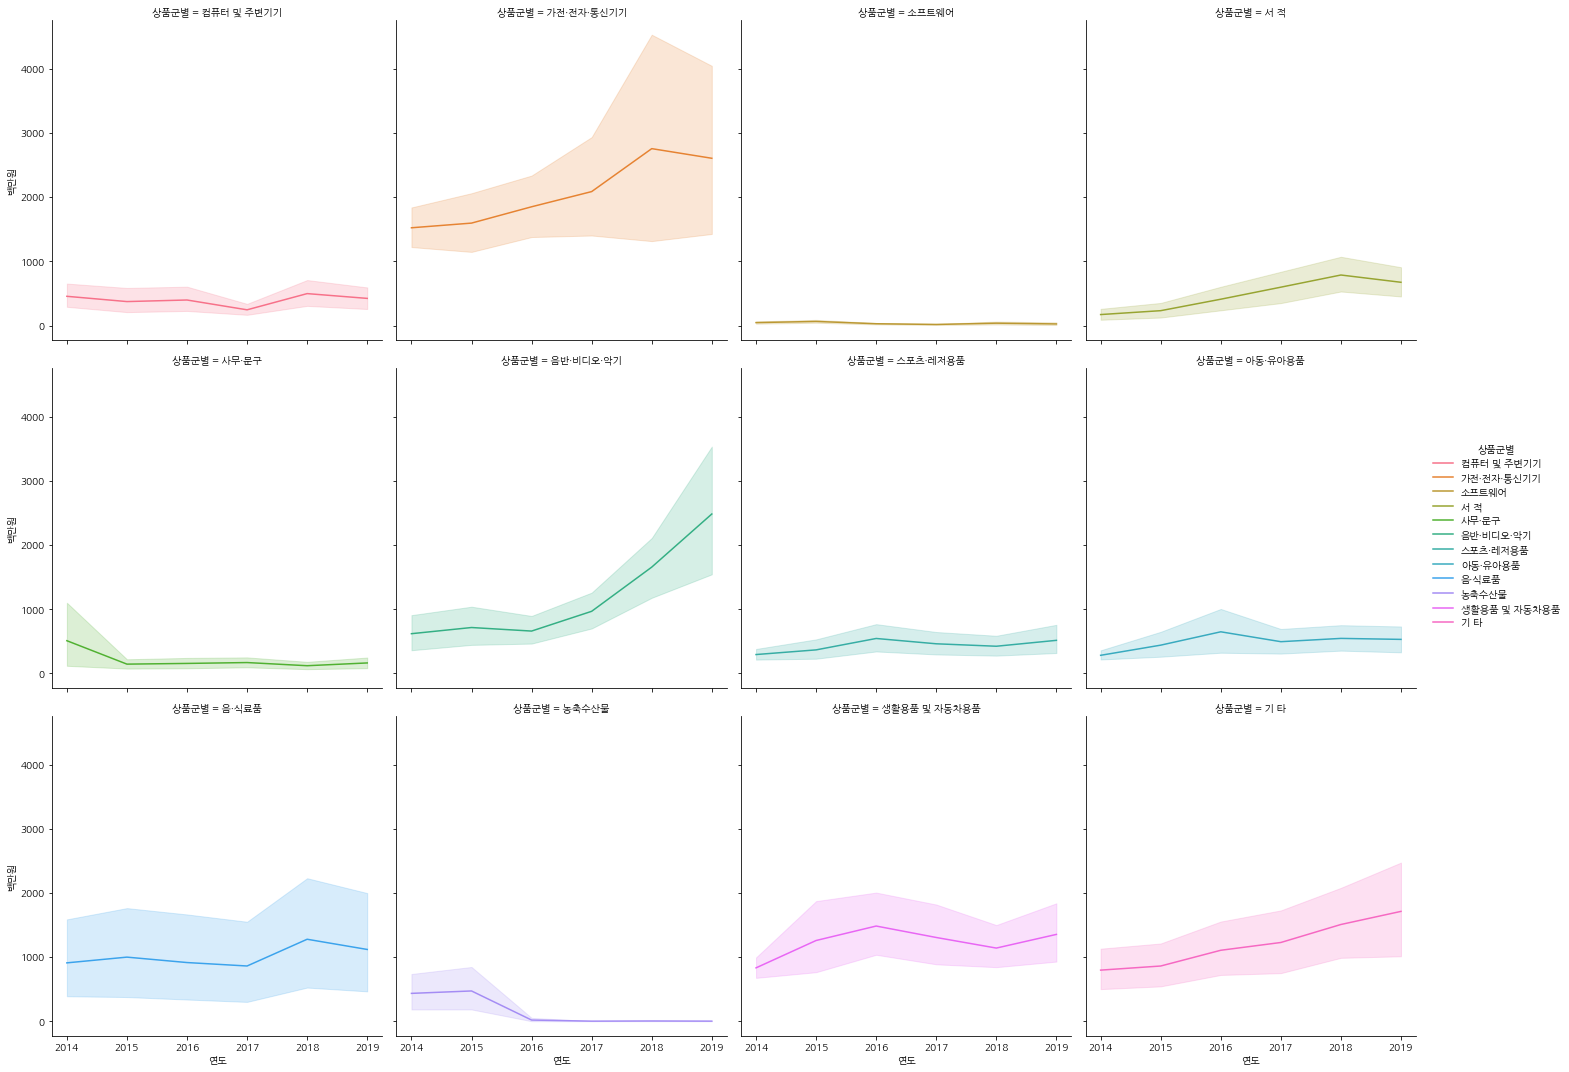

In [19]:
# 연도별 판매익을 상품군별로 replot을 활용해 서브플롯으로 그려보기
sns.relplot(data = df_sub, x = "연도", y = "백만원",
            hue="상품군별", kind = "line", col = "상품군별", col_wrap = 4)

## 6.2 화장품의 온라인쇼핑 해외직접판매액

In [20]:
# df_cosmetic 이라는 변수에 상품군별이 화장품인 데이터만 가져오기

df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

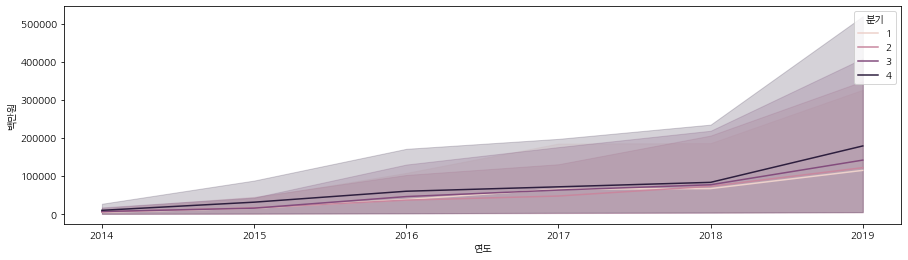

In [21]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 표현해 보기
plt.figure(figsize = (15,4))
sns.lineplot(data = df_cosmetic, x = "연도", y = "백만원", hue = "분기")

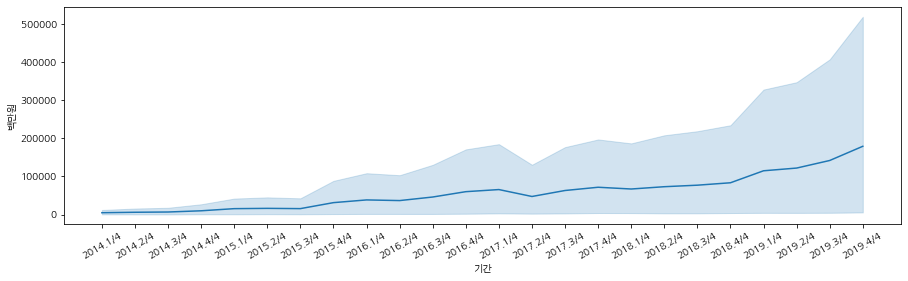

In [22]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic, x = "기간", y = "백만원")

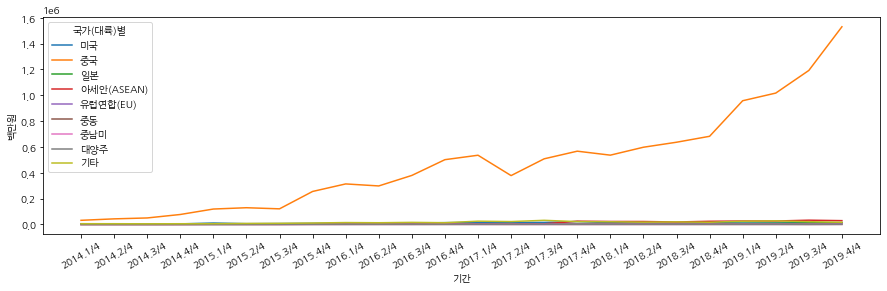

In [23]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic, x = "기간", y = "백만원", hue = "국가(대륙)별")

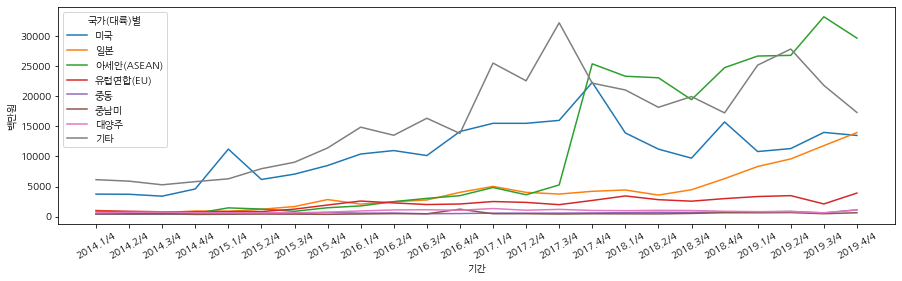

In [24]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기 (중국제외)
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x = "기간", y = "백만원", hue = "국가(대륙)별")

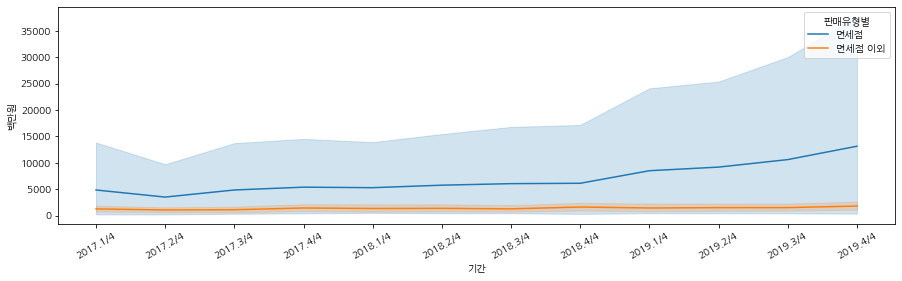

In [25]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "판매유형별"로 다른 색상으로 표시하기
df_sub = df[df["판매유형별"] != "계"].copy()
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_sub, x = "기간", y = "백만원", hue = "판매유형별")

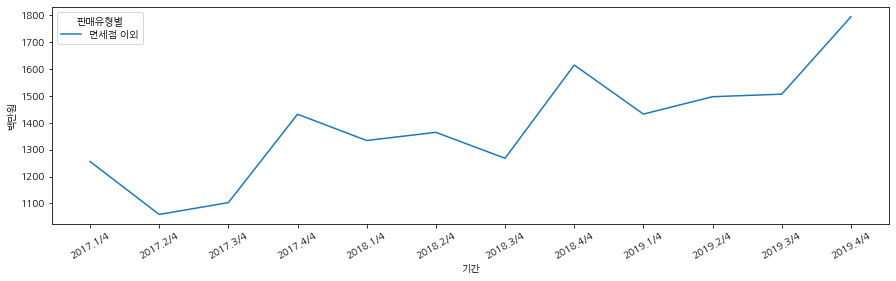

In [26]:
# 면세점 이외 데이터만 시각화
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_sub, x = "기간", y = "백만원", hue = "판매유형별", ci = None)

## 6.3 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [27]:
# df_fashion 이라는 변수에 의류 데이터만 가져와 따로 담아주기

df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1


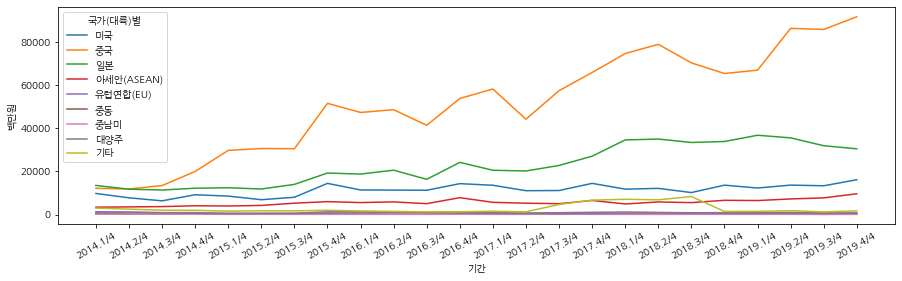

In [28]:
# 의류 및 패션 관련상품 판매액에 대한 기간별 금액 데이터 시각화하고
# 국가(대륙)별로 다른 색상으로 표시하기
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion , x = "기간", y = "백만원",hue = "국가(대륙)별")

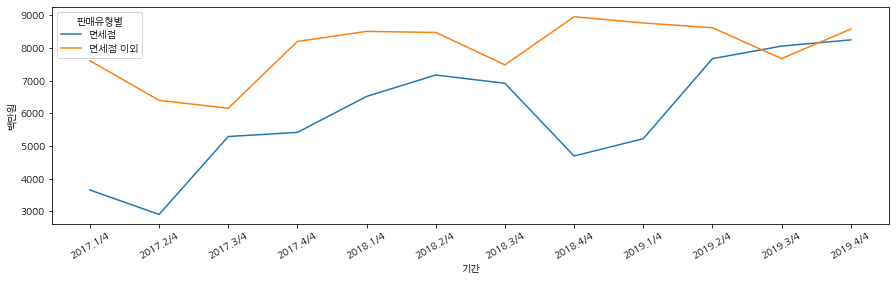

In [29]:
# 의류 및 패션 관련상품 판매액에 대한 기간별 금액 데이터 시각화하고
# 판매유형별별로 다른 색상으로 표시하기
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion2 , x = "기간", y = "백만원",hue = "판매유형별", ci = None)

## 6.4 데이터 집계하기

In [30]:
# 피봇테이블로 국가(대륙)별, 연도 별 합계 금액을 표 형태로 구하기

result = df_fashion.pivot_table(index = "국가(대륙)별", columns = "연도", values = "백만원", aggfunc = "sum")
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0


## 6.5 연산결과를 시각적으로 보기

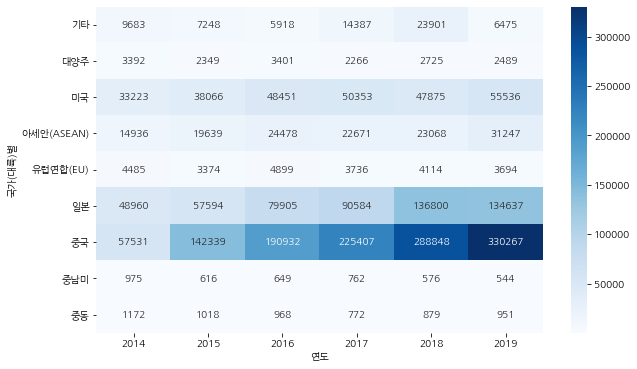

In [31]:
# 피봇테이블로 구한 결과를 값이 많고 작음에 따라 시각적으로 표현하기
plt.figure(figsize = (10,6))
sns.heatmap(result, cmap = "Blues", annot = True, fmt = ".0f")

# 7. 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

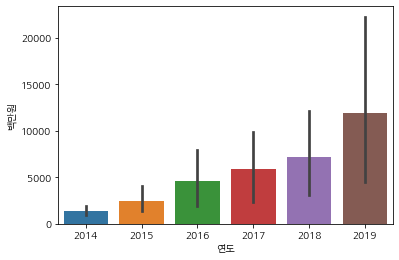

In [32]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화 하기

sns.barplot(data = df_total, x = "연도", y = "백만원")

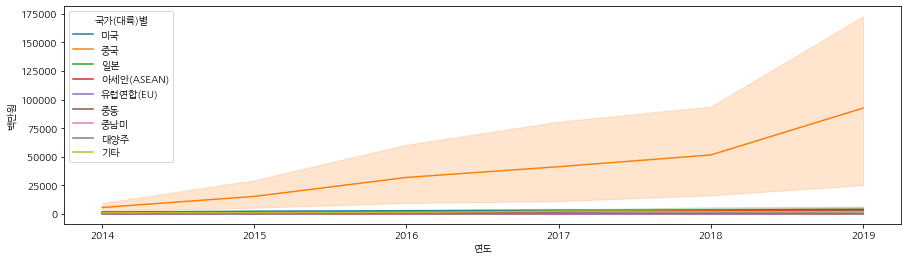

In [33]:
# 연도별 판매액을 그리고 국가(대륙)별로 다른 색상으로 표현하기
plt.figure(figsize = (15,4))
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "국가(대륙)별")

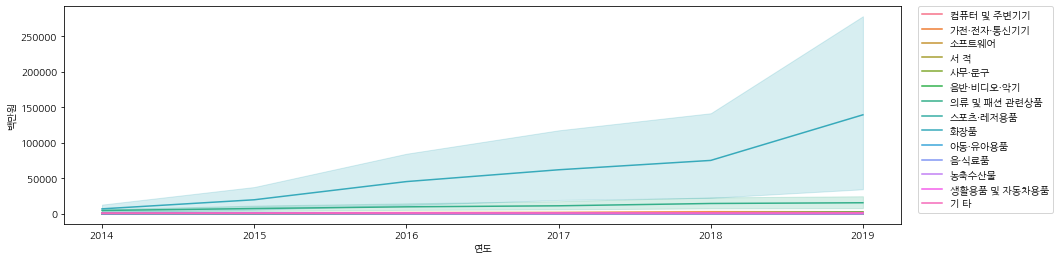

In [34]:
# 연도별 판매액을 그리고 상품군별로 다른 색상으로 표현하기

plt.figure(figsize = (15,4))
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별")
plt.legend(bbox_to_anchor = (1.02,1), loc = 2, borderaxespad=0.)